In [2]:
import testing as tst
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from pickle import load, dump 
import math
import datetime
import calplot


# Choosing the best and the worst network

In [16]:
val_data_archivo='../../01_weather_data/02_cleaned_data/esoru_night_angles_2.csv'
val_data_archivo_2='../../01_weather_data/02_cleaned_data/esoru_night_angles.csv'
validation=pd.read_csv(val_data_archivo,index_col=0,parse_dates=True)
validation_2=pd.read_csv(val_data_archivo_2,index_col=0,parse_dates=True)


In [17]:
tabnames=[]
for i in range(1,10,1):
    for o in range (1,4,1):
        tabnames.append(int(str(i)+str(o)))
tabnames=pd.Series(tabnames)

In [18]:
metricas=['model','E_dmae','E_dmape','mae_de_día_promedio']
hpt=pd.read_csv('4metricas_tabla_all.csv')[metricas]
# hpt=hpt.columns(['model','E_dmae','E_dmape','mae_Ig'])
hpt=pd.concat([tabnames,hpt],axis=1)
hpt=hpt.set_index(hpt.mae_de_día_promedio)
hpt

,0,model,E_dmae,E_dmape,mae_de_día_promedio
mae_de_día_promedio,,,,,
93.439908,11,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1...,667.787027,11.624583,93.439908
92.157869,12,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1...,645.520003,11.362791,92.157869
98.008985,13,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1...,634.197143,11.100360,98.008985
85.564206,21,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1...,590.860541,10.648727,85.564206
82.062640,22,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1...,546.065838,10.179817,82.062640
84.311044,23,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1...,573.741509,10.444551,84.311044
80.582398,31,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_0...,544.220520,10.045735,80.582398
82.727567,32,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_0...,552.727759,10.418220,82.727567
82.865735,33,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_0...,554.240297,10.282335,82.865735


In [19]:
# hpt.tiempo_train=pd.to_timedelta(hpt.tiempo_train)
# hpt=hpt.set_index(hpt.mae_de_dia_promedio)
hpt=hpt.sort_index()
# hpt.astype(int)
# hpt.mae_de_dia_promedio=hpt.mae_de_dia_promedio.astype(float)
# fig, ax=plt.subplots(figsize=(10,15))
# ax.plot(hpt.dif_energia_wh,'b.')
hpt.set_index(hpt.model)

,0,model,E_dmae,E_dmape,mae_de_día_promedio
model,,,,,
train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_0.0001_Global_BS12.h5,62,train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_0...,539.512341,10.175225,80.135618
train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_0.0001_Global_BS6.h5,31,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_0...,544.220520,10.045735,80.582398
train_seasonal_layers_1_1_1_out_s_6in_s_6_lr_0.0001_Global_BS24.h5,93,train_seasonal_layers_1_1_1_out_s_6in_s_6_lr_0...,549.184028,10.156253,81.024751
train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_0.0001_Global_BS6.h5,61,train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_0...,554.310827,10.362297,81.326399
train_seasonal_layers_1_1_1_out_s_6in_s_6_lr_0.0001_Global_BS12.h5,92,train_seasonal_layers_1_1_1_out_s_6in_s_6_lr_0...,537.940347,10.092594,81.528066
train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_0.0001_Global_BS24.h5,63,train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_0...,552.249958,10.264829,81.551407
train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1e-05_Global_BS12.h5,22,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1...,546.065838,10.179817,82.062640
train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_1e-05_Global_BS6.h5,51,train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_1...,543.090705,10.191902,82.646980
train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_0.0001_Global_BS12.h5,32,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_0...,552.727759,10.418220,82.727567


In [20]:
params={'text.latex.preamble':'\\usepackage{lmodern,amsmath}',
       'text.usetex':True,
       'font.size':10,
       'font.family':'lmodern'}
h_fmt=mdates.DateFormatter('%m-%d-%H')
hours=mdates.HourLocator(byhour=[0,6,12,18,24])
plt.rcParams.update(params)

## Worst network

In [21]:
yearly_w,daily_w,hourly_w=tst.dfmetricas(pd.read_csv('73.csv',index_col=0,parse_dates=True),validation,'train_seasonal_layers_1_1_1_out_s_6in_s_6_lr_1e-07_Global_BS24.h5')




(<Figure size 720x144 with 2 Axes>,
 array([<AxesSubplot:ylabel='2019'>], dtype=object))

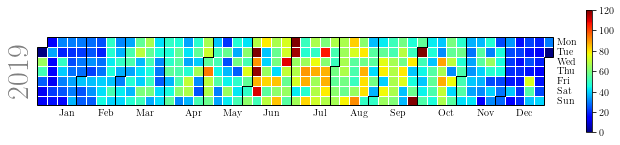

In [22]:
calplot.calplot(daily_w['mae'],cmap='jet',how='mean',vmin=0,vmax=120,edgecolor='black',linewidth=1,figsize=(10,2))
# plt.title('Worst_architecture daily mae',fontsize=20) #vmax=230

### Worst_day worst network

In [23]:
daily_w.mae.idxmax()

Timestamp('2019-10-01 00:00:00', freq='D')

mae_del_dia: 145.87081478638117


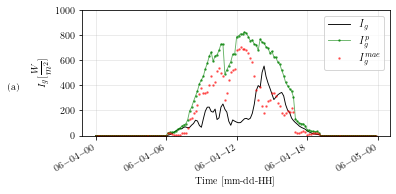

In [69]:
fecha='2019-06-04'
size=(5.63,2.8)#2.8)#(6,3.6)
ylabel='$I_g$[$\dfrac{W}{m^2}$]'
Ig='$I_g$'
Igp='$I_g^p$'
Igmae='$I_g^{mae}$'
left, width = -.4, .2
right=left+width
bottom, height = .1, .25
top = bottom + height
# Title='Worst day worst model'

fig, ax=plt.subplots( figsize=size)
ax.plot(hourly_w.Global[fecha],'k-',label=Ig,linewidth=.9,markersize=3)
ax.plot(hourly_w.prediccion[fecha],'g.-',label=Igp,alpha=.6,linewidth=.9,markersize=3)
ax.plot(hourly_w.mae[fecha],'r.',label=Igmae,alpha=.5,linewidth=.9,markersize=3)
ax.legend(fontsize=11)

ax.grid(alpha=.3)
ax.set_ylim(0,1000)
ax.xaxis.set_major_formatter(h_fmt)
ax.xaxis.set_major_locator(hours)
fig.autofmt_xdate()
# plt.title(Title,fontsize=20)
ax.set_xlabel('Time [mm-dd-HH]')
ax.set_ylabel(ylabel)

ax.text(right, top, '(a)',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
print('mae_del_dia:',daily_w.mae.loc[fecha])
plt.tight_layout()
plt.savefig('../../../Tesis_repo/figures/wdwn.pdf')

### The best day 

mae_del_dia: 16.495543081495498


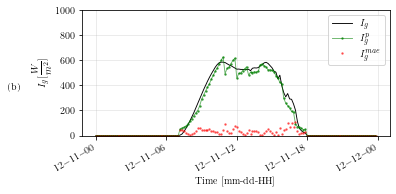

In [70]:
fecha='2019-12-11'
# Title='Best day worst model'
fig, ax=plt.subplots(figsize=size)
ax.plot(hourly_w.Global[fecha],'k-',label=Ig,linewidth=.9,markersize=3)
ax.plot(hourly_w.prediccion[fecha],'g.-',label=Igp,alpha=.6,linewidth=.9,markersize=3)
ax.plot(hourly_w.mae[fecha],'r.',label=Igmae,alpha=.5,linewidth=.9,markersize=3)

ax.legend()
ax.grid(alpha=.3)
ax.set_ylim(0,1000)
# plt.title(Title,fontsize=20)
ax.set_xlabel('Time [mm-dd-HH]')
ax.set_ylabel(ylabel)
ax.text(right, top, '(b)',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.xaxis.set_major_formatter(h_fmt)
ax.xaxis.set_major_locator(hours)
fig.autofmt_xdate()
print('mae_del_dia:',daily_w.mae.loc[fecha])
plt.tight_layout()
plt.savefig('../../../Tesis_repo/figures/bdwn.pdf')


# Best architecture

In [26]:
yearly_b2,daily_b2,hourly_b2=tst.dfmetricas(pd.read_csv('62.csv',index_col=0,parse_dates=True),validation,'train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_0.0001_Global_BS12.h5')
# tablita=['model','E_dmae','E_dmape','mae_Ig']

(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2019'>], dtype=object))

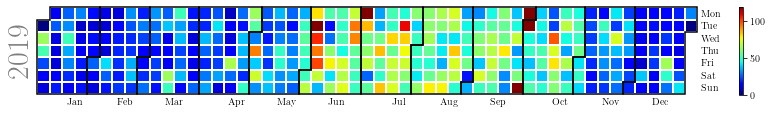

In [27]:
calplot.calplot(daily_b2['mae'],cmap='jet',how='mean',vmin=0,vmax=120,edgecolor='black',linewidth=1.5)
# plt.title('Best_architecture daily mae')
# plt.savefig('../../../Tesis_repo/figures/calplot_mae_w.png')

### Worst day best network

In [28]:
daily_b2.mae.idxmax()

Timestamp('2019-06-04 00:00:00', freq='D')

mae_del_dia: 175.13087335774634


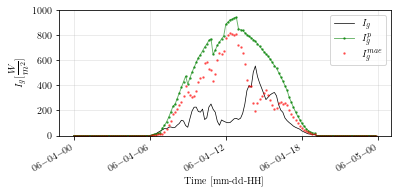

In [39]:
fecha='2019-06-04'
# Title='Worst day_best model'
fig, ax=plt.subplots(figsize=size)
ax.plot(hourly_b2.Global[fecha],'k-',label=Ig,linewidth=.7,markersize=3)
ax.plot(hourly_b2.prediccion[fecha],'g.-',label=Igp,alpha=.6,linewidth=.9,markersize=3)
ax.plot(hourly_b2.mae[fecha],'r.',label=Igmae,alpha=.5,linewidth=.9,markersize=3)

ax.grid(alpha=.3)
ax.legend()
ax.set_ylim(0,1000)
# plt.title(Title,fontsize=20)
ax.set_xlabel('Time [mm-dd-HH]')
ax.set_ylabel(ylabel)
ax.xaxis.set_major_formatter(h_fmt)
ax.xaxis.set_major_locator(hours)
fig.autofmt_xdate()
print('mae_del_dia:',daily_b2.mae.loc[fecha])
plt.tight_layout()
plt.savefig('../../../Tesis_repo/figures/wdbn.pdf')



### Best day best network

mae_del_dia: 7.15249186982049


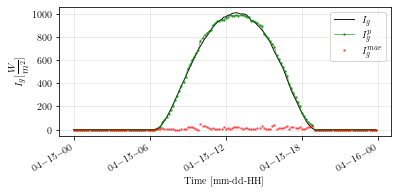

In [40]:
# fecha='2019-12-28'
fecha='2019-04-15'
# Title='Best day best model'
fig, ax=plt.subplots(figsize=size)
ax.plot(hourly_b2.Global[fecha],'k-',label=Ig,linewidth=.9,markersize=3)
ax.plot(hourly_b2.prediccion[fecha],'g.-',label=Igp,alpha=.6,linewidth=.9,markersize=3)
ax.plot(hourly_b2.mae[fecha],'r.',label=Igmae,alpha=.5,linewidth=.9,markersize=3)

ax.grid(alpha=.3)
ax.legend()
# plt.title(Title,fontsize=20)
ax.set_xlabel('Time [mm-dd-HH]')
ax.set_ylabel(ylabel)
ax.xaxis.set_major_formatter(h_fmt)
ax.xaxis.set_major_locator(hours)
fig.autofmt_xdate()
print('mae_del_dia:',daily_b2.mae.loc[fecha])
plt.tight_layout()
plt.savefig('../../../Tesis_repo/figures/bdbn.pdf')


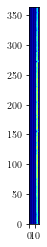

In [31]:
imshow=plt.imshow(daily_b2,cmap='jet',vmin=0,vmax=120,alpha=1,aspect='equal',origin='lower')
imshow2=plt.imshow(daily_b2,cmap='jet',vmin=0,vmax=1000*9,alpha=1,aspect='equal',origin='lower')

/var/folders/7n/c_cvng9j735c5pvm2v5k2tdh0000gp/T/ipykernel_47773/440445904.py:5: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(imshow,label='$I_g^{mae}[\dfrac{W}{m^2}]$')
/var/folders/7n/c_cvng9j735c5pvm2v5k2tdh0000gp/T/ipykernel_47773/440445904.py:12: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(imshow,label='$I_g^{mae}[\dfrac{W}{m^2}]$')
/var/folders/7n/c_cvng9j735c5pvm2v5k2tdh0000gp/T/ipykernel_47773/440445904.py:17: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current 

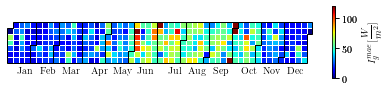

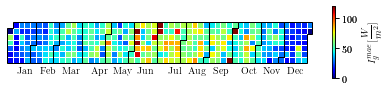

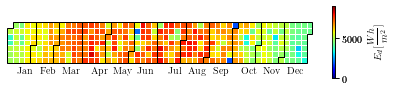

In [32]:
calplotsize=(5.6,1.3)#(6.5,1.3)
calplot.calplot(daily_b2['mae'],yearlabels=False,dayticks=False,cmap='jet',how='mean'
                ,vmin=0,vmax=120,edgecolor='black',linewidth=1,figsize=calplotsize)

plt.colorbar(imshow,label='$I_g^{mae}[\dfrac{W}{m^2}]$')
# plt.title('Best model daily mae',fontsize=10)
# plt.colorbar(label='$[/dfrac{W}{m^2}]$')
# plt.savefig('../../../Tesis_repo/figures/bnmae.pdf')

calplot.calplot(daily_w['mae'],yearlabels=False,dayticks=False,cmap='jet',how='mean',vmin=0,vmax=120,edgecolor='black',linewidth=1,figsize=calplotsize)
# plt.title('Worst model daily mae',fontsize=10)
plt.colorbar(imshow,label='$I_g^{mae}[\dfrac{W}{m^2}]$')
# plt.savefig('../../../Tesis_repo/figures/wnmae.pdf')

calplot.calplot(daily_w['E_d'],yearlabels=False,dayticks=False,cmap='jet',how='mean',vmin=0,vmax=1000*9,edgecolor='black',linewidth=1,figsize=calplotsize)
# plt.title('Daily total radiation energy [wh/m2]',fontsize=10)
plt.colorbar(imshow2,label='$E_d[\dfrac{Wh}{m^2}]$')
# plt.savefig('../../../Tesis_repo/figures/day_rad.pdf')



In [33]:
def typical_error_day(dfrad):
    dfmingroup=dfrad.groupby(['minutodia',pd.Grouper(freq='1H')]).mean()
    dfmindia=dfmingroup.groupby(pd.Grouper(level='minutodia',axis=0)).mean()
    meanaltura=dfmindia.alturasolar.mean()
    meandiay=dfmindia.me.mean()
    return(dfmindia.mae,dfmindia.me)

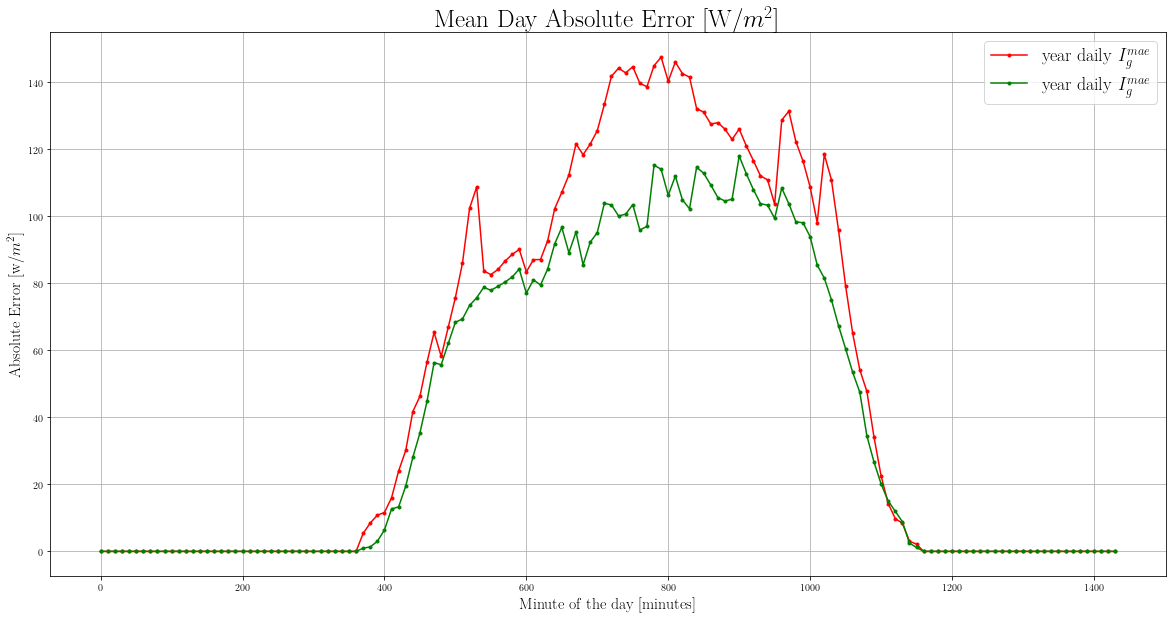

In [44]:
worst_mae,worst_me=typical_error_day(hourly_w)
best_mae,best_me=typical_error_day(hourly_b2)

fig, ax= plt.subplots(figsize=(20,10))
ax.plot(worst_mae,'r.-',label=' year daily $I_g^{mae}$')
ax.plot(best_mae,'g.-',label=' year daily $I_g^{mae}$')

plt.title('Mean Day Absolute Error [W/$m^2$]',fontsize=25)
ax.legend(fontsize=18)
ax.set_ylabel('Absolute Error [w/$m^2$]',fontsize=16)
ax.set_xlabel('Minute of the day [minutes]',fontsize=16)
plt.grid()

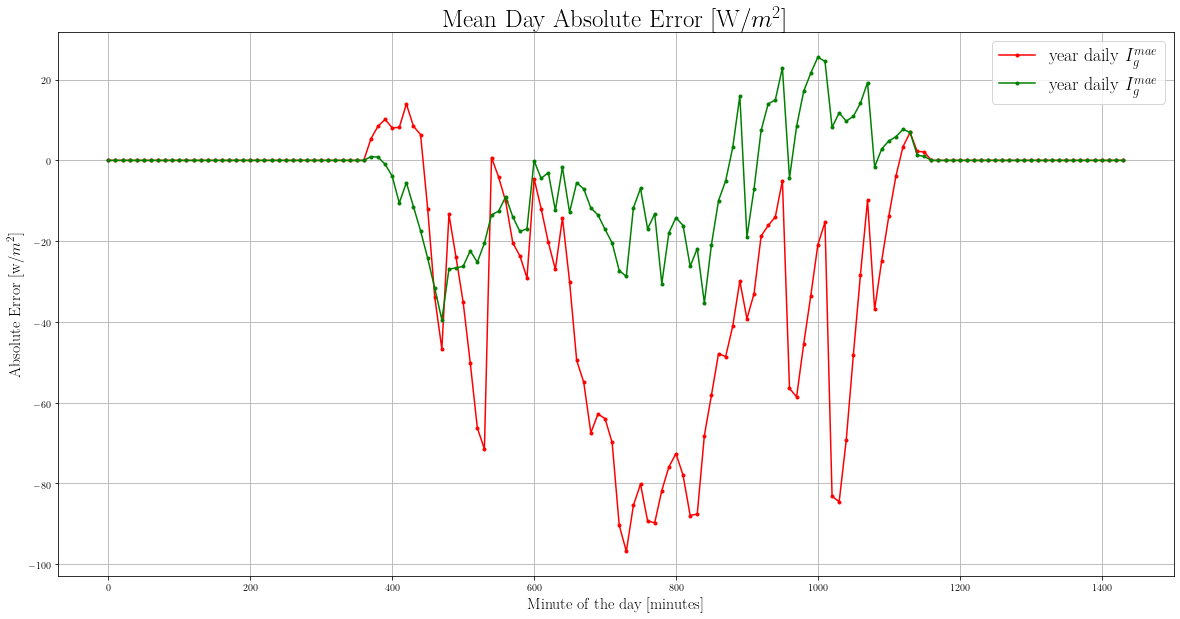

In [45]:
fig, ax= plt.subplots(figsize=(20,10))

ax.plot(worst_me,'r.-',label='year daily $I_g^{mae}$')
ax.plot(best_me,'g.-',label='year daily $I_g^{mae}$')

plt.title('Mean Day Absolute Error [W/$m^2$]',fontsize=25)
ax.legend(fontsize=18)
ax.set_ylabel('Absolute Error [w/$m^2$]',fontsize=16)
ax.set_xlabel('Minute of the day [minutes]',fontsize=16)
plt.grid()
# print('diferencia [w/m2] promedio anual:',meandiay) 

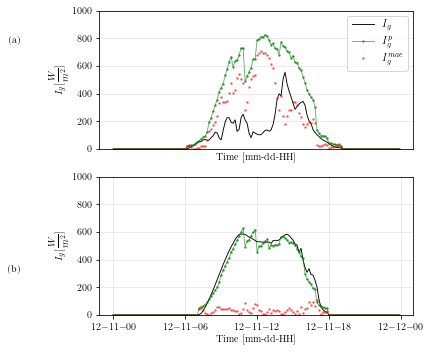

In [221]:
size=(5.63,2.8*2)#2.8)#(6,3.6)
left, width = -.45, .2
right1=left+width
bottom, height = .5, .25
top1 = bottom + height

left, width = -.45, .2
right2=left+width
bottom, height = -.1, .4
top2 = bottom + height
fig = plt.figure(figsize=size)
gs=plt.GridSpec(2,1,figure=fig)
ax1=fig.add_subplot(gs[0,:])
ax2=fig.add_subplot(gs[1,:])
fecha1='2019-06-04'
# fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True,figsize=[size,size])
ax1.plot(hourly_w.Global[fecha1],'k-',label=Ig,linewidth=.9,markersize=3)
ax1.plot(hourly_w.prediccion[fecha1],'g.-',label=Igp,alpha=.6,linewidth=.9,markersize=3)
ax1.plot(hourly_w.mae[fecha1],'r.',label=Igmae,alpha=.5,linewidth=.9,markersize=3)
ax1.legend(fontsize=11)
# plt.tight_layout()
ax1.grid(alpha=.3)
ax1.set_ylim(0,1000)
ax1.xaxis.set_major_formatter(h_fmt)
ax1.xaxis.set_major_locator(hours)
# fig.autofmt_xdate()
# plt.title(Title,fontsize=20)
ax1.set_xlabel('Time [mm-dd-HH]')
ax1.set_ylabel(ylabel)

ax1.text(right1, top1, '(a)',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax1.transAxes)
# print('mae_del_dia:',daily_w.mae.loc[fecha])

# plt.tight_layout()
# plt.savefig('../../../Tesis_repo/figures/wdwn.pdf')
fecha2='2019-12-11'
ax2.plot(hourly_w.Global[fecha2],'k-',label=Ig,linewidth=.9,markersize=3)
ax2.plot(hourly_w.prediccion[fecha2],'g.-',label=Igp,alpha=.6,linewidth=.9,markersize=3)
ax2.plot(hourly_w.mae[fecha2],'r.',label=Igmae,alpha=.5,linewidth=.9,markersize=3)

# ax2.legend()
ax2.grid(alpha=.3)
ax2.set_ylim(0,1000)
# plt.title(Title,fontsize=20)
ax2.set_xlabel('Time [mm-dd-HH]')
ax2.set_ylabel(ylabel)
ax2.text(right2, top2, '(b)',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax2.transAxes)
ax2.xaxis.set_major_formatter(h_fmt)
ax2.xaxis.set_major_locator(hours)
# fig.autofmt_xdate()
# print('mae_del_dia:',daily_w.mae.loc[fecha])
# plt.tight_layout()
# plt.savefig('../../../Tesis_repo/figures/wndays.pdf')

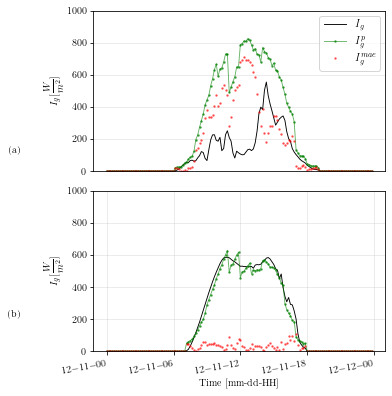

In [216]:
left, width = -.45, .2
right1=left+width
bottom, height = -.15, .25
top1 = bottom + height

left, width = -.45, .2
right2=left+width
bottom, height = -.2, .4
top2 = bottom + height





fig,ax=plt.subplots(2,1,figsize=size)
ax[0].plot(hourly_w.Global[fecha1],'k-',label=Ig,linewidth=.9,markersize=3)
ax[0].plot(hourly_w.prediccion[fecha1],'g.-',label=Igp,alpha=.6,linewidth=.9,markersize=3)
ax[0].plot(hourly_w.mae[fecha1],'r.',label=Igmae,alpha=.5,linewidth=.9,markersize=3)
ax[0].legend(fontsize=11)
# plt.tight_layout()
ax[0].grid(alpha=.3)
ax[0].set_ylim(0,1000)
ax[0].xaxis.set_major_formatter(h_fmt)
ax[0].xaxis.set_major_locator(hours)
ax[0].set_xlabel('Time [mm-dd-HH]')
ax[0].set_ylabel(ylabel)
fig.autofmt_xdate(rotation=10)

ax[0].text(right1, top1, '(a)',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax[0].transAxes)
fecha2='2019-12-11'
ax[1].plot(hourly_w.Global[fecha2],'k-',label=Ig,linewidth=.9,markersize=3)
ax[1].plot(hourly_w.prediccion[fecha2],'g.-',label=Igp,alpha=.6,linewidth=.9,markersize=3)
ax[1].plot(hourly_w.mae[fecha2],'r.',label=Igmae,alpha=.5,linewidth=.9,markersize=3)

# ax2.legend()
ax[1].grid(alpha=.3)
ax[1].set_ylim(0,1000)
# plt.title(Title,fontsize=20)
ax[1].set_xlabel('Time [mm-dd-HH]')
ax[1].set_ylabel(ylabel)
ax[1].text(right2, top2, '(b)',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax[1].transAxes)
ax[1].xaxis.set_major_formatter(h_fmt)
ax[1].xaxis.set_major_locator(hours)
fig.tight_layout()

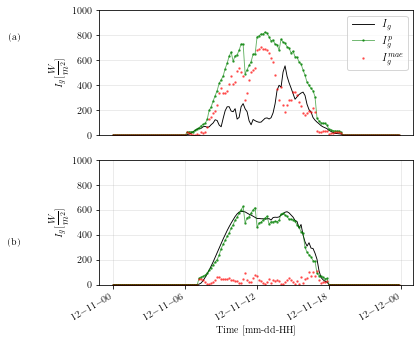

In [220]:
fig